In [1]:
import pandas as pd
from evaluation.config import DATA_DIR
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from typing import List

# housing

In [2]:
housing_in_df = pd.read_parquet(DATA_DIR / "estimates" / "combined" / "housing.parquet")
housing_in_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,run_idx,model,method,dataset,observation_id,n_samples
0,2970.344202,-3411.040165,-99852.193378,-21423.332202,-4234.749984,-61471.247745,-29833.106761,12286.380278,-72836.023942,0,xgboost,exact,housing,0,NaN
1,2970.344202,-3411.040165,-99852.193378,-21423.332202,-4234.749984,-61471.247745,-29833.106761,12286.380278,-72836.023942,1,xgboost,exact,housing,0,NaN
2,2970.344202,-3411.040165,-99852.193378,-21423.332202,-4234.749984,-61471.247745,-29833.106761,12286.380278,-72836.023942,2,xgboost,exact,housing,0,NaN
3,2970.344202,-3411.040165,-99852.193378,-21423.332202,-4234.749984,-61471.247745,-29833.106761,12286.380278,-72836.023942,3,xgboost,exact,housing,0,NaN
4,2970.344202,-3411.040165,-99852.193378,-21423.332202,-4234.749984,-61471.247745,-29833.106761,12286.380278,-72836.023942,4,xgboost,exact,housing,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,-3058.418466,-2406.049769,-64549.743977,-3832.636949,-2860.619323,3134.606913,-43431.468693,34560.971581,45596.022297,4995,svm,unbiased,housing,9,500.0
699996,3060.160234,-2500.851166,-68082.179220,-4738.801880,-2207.818448,12639.592219,-51266.048094,29888.063803,46360.546165,4996,svm,unbiased,housing,9,500.0
699997,-2260.391545,-2704.828612,-64767.236585,-5379.359402,-476.949784,6005.896136,-47614.546860,40475.892058,39874.188207,4997,svm,unbiased,housing,9,500.0
699998,7268.326131,2163.077260,-64442.070540,-2425.292472,-4718.094340,2580.287124,-43964.392289,25421.872696,41268.950043,4998,svm,unbiased,housing,9,500.0


In [3]:
def exact_with_samples(df: pd.DataFrame, n_samples: int) -> pd.DataFrame:
    res = df[df.method == "exact"].copy()
    res.n_samples = res.n_samples.fillna(n_samples).astype(int)
    return res


In [4]:
housing_df = pd.concat(
    [
        housing_in_df[housing_in_df.method != "exact"],
        exact_with_samples(housing_in_df, 50),
        exact_with_samples(housing_in_df, 200),
        exact_with_samples(housing_in_df, 500),
    ]
).reset_index(drop=True)
housing_df.n_samples = housing_df.n_samples.astype(int)
housing_df = housing_df.set_index(
    [
        "run_idx",
        "model",
        "observation_id",
        "n_samples",
    ]
).drop(columns="dataset")
housing_df


,,,,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,method
run_idx,model,observation_id,n_samples,,,,,,,,,,
0,xgboost,0,50,0.000000,-3982.656519,-84896.633776,-23202.576710,-4163.077877,-56448.338470,-26755.918627,11999.165554,-66689.282600,kernel
1,xgboost,0,50,0.000000,-2591.946076,-85426.107422,-24725.926179,-3841.456162,-56365.283188,-26946.220314,12695.910435,-66938.290120,kernel
2,xgboost,0,50,0.000000,-2317.513589,-86453.651575,-24151.027690,-3378.189484,-56828.339614,-26540.271016,11706.419588,-66176.745647,kernel
3,xgboost,0,50,0.000000,-2856.681648,-85731.588492,-25036.270406,-3609.027268,-56354.698881,-26726.035516,12215.894559,-66040.911373,kernel
4,xgboost,0,50,0.000000,-2147.650964,-86912.441256,-24531.207152,-3429.401828,-56264.771708,-26286.564681,12182.855879,-66750.137315,kernel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,svm,9,500,15.826187,-0.880126,-80180.794094,-2155.565530,-9.308519,-106.303938,-46353.026681,33804.678387,37539.828882,exact
4996,svm,9,500,15.826187,-0.880126,-80180.794094,-2155.565530,-9.308519,-106.303938,-46353.026681,33804.678387,37539.828882,exact
4997,svm,9,500,15.826187,-0.880126,-80180.794094,-2155.565530,-9.308519,-106.303938,-46353.026681,33804.678387,37539.828882,exact


In [5]:
HOUSING_FEATURES = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    "floors",
    "grade",
    "sqft_above",
    "sqft_basement",
    "yr_built",
]


## absolute error

In [6]:
housing_kernel_error_df = housing_df[housing_df.method == 'kernel'].drop(columns='method') - housing_df[housing_df.method=='exact'].drop(columns='method')
housing_kernel_error_df['method'] = 'kernel'
housing_unbiased_error_df = housing_df[housing_df.method == 'unbiased'].drop(columns='method') - housing_df[housing_df.method=='exact'].drop(columns='method')
housing_unbiased_error_df['method'] = 'unbiased'
housing_error_df = pd.concat([housing_kernel_error_df, housing_unbiased_error_df])
housing_error_df

bedrooms     bathrooms  \
run_idx model   observation_id n_samples                               
0       svm     0              50            -0.607240      0.282835   
                               200           -0.607240      0.282835   
                               500           -0.607240      0.282835   
                1              50            -0.607240      0.282835   
                               200           -0.607240      0.282835   
...                                                ...           ...   
4999    xgboost 8              200        33412.080629 -12959.874573   
                               500         3748.566634 -29270.178959   
                9              50         -5394.109723 -17232.308313   
                               200        27860.925948 -42055.823225   
                               500        -2522.891734 -13674.981960   

                                           sqft_living      sqft_lot  \
run_idx model   observation_id n_samples                               
0       svm     0              50         13945.229874   -629.244148   
                               200        13945.229873   -629.244148   
                               500        13945.229873   -629.244148   
                1              50         13945.229873   -629.244148   
                               200        13945.229873   -629.244148   
...                                                ...           ...   
4999    xgboost 8              200        26088.283631 -14174.760776   
                               500        18127.982697   5642.528236   
                9              50         37919.908736   4648.522580   
                               200        25747.927137   7183.149879   
                               500        19625.264011  -6406.523000   

                                                floors         grade  \
run_idx model   observation_id n_samples                               
0       svm     0              50             0.427978      5.434761   
                               200            0.427978      5.434762   
                               500            0.427978      5.434762   
                1              50             0.427978      5.434762   
                               200            0.427978      5.434762   
...                                                ...           ...   
4999    xgboost 8              200        -3936.584922  17266.587683   
                               500          615.890543   8357.234794   
                9              50        -13285.266806  31050.975421   
                               200         8535.764493 -20725.730588   
                               500        -6607.317790   4886.961985   

                                            sqft_above  sqft_basement  \
run_idx model   observation_id n_samples                                
0       svm     0              50          3948.824420    1740.796473   
                               200         3948.824420    1740.796473   
                               500         3948.824420    1740.796473   
                1              50          3948.824420    1740.796472   
                               200         3948.824420    1740.796472   
...                                                ...            ...   
4999    xgboost 8              200         7607.737046  -37606.261082   
                               500        10746.165509   -3182.648868   
                9              50        -16366.608826   -7318.625975   
                               200         4989.017931    -507.693133   
                               500         -895.249673   21799.401389   

                                              yr_built    method  
run_idx model   observation_id n_samples                          
0       svm     0              50          1587.064093    kernel  
                               200         1587.064093    kernel  
                 

In [59]:
def plot_features(
    df: pd.DataFrame, model: str, observation_id: int, features: List[str]
) -> None:
    nrows = (len(features) + 2) // 3
    fig, axs = plt.subplots(nrows, 3, figsize=(20, nrows * 5))
    idx = df.model == model
    idx = df.observation_id == observation_id
    for ax, feature in zip(axs.reshape(-1), features):
        sns.lineplot(data=df[idx], x="n_samples", y=feature, hue="method", ax=ax)


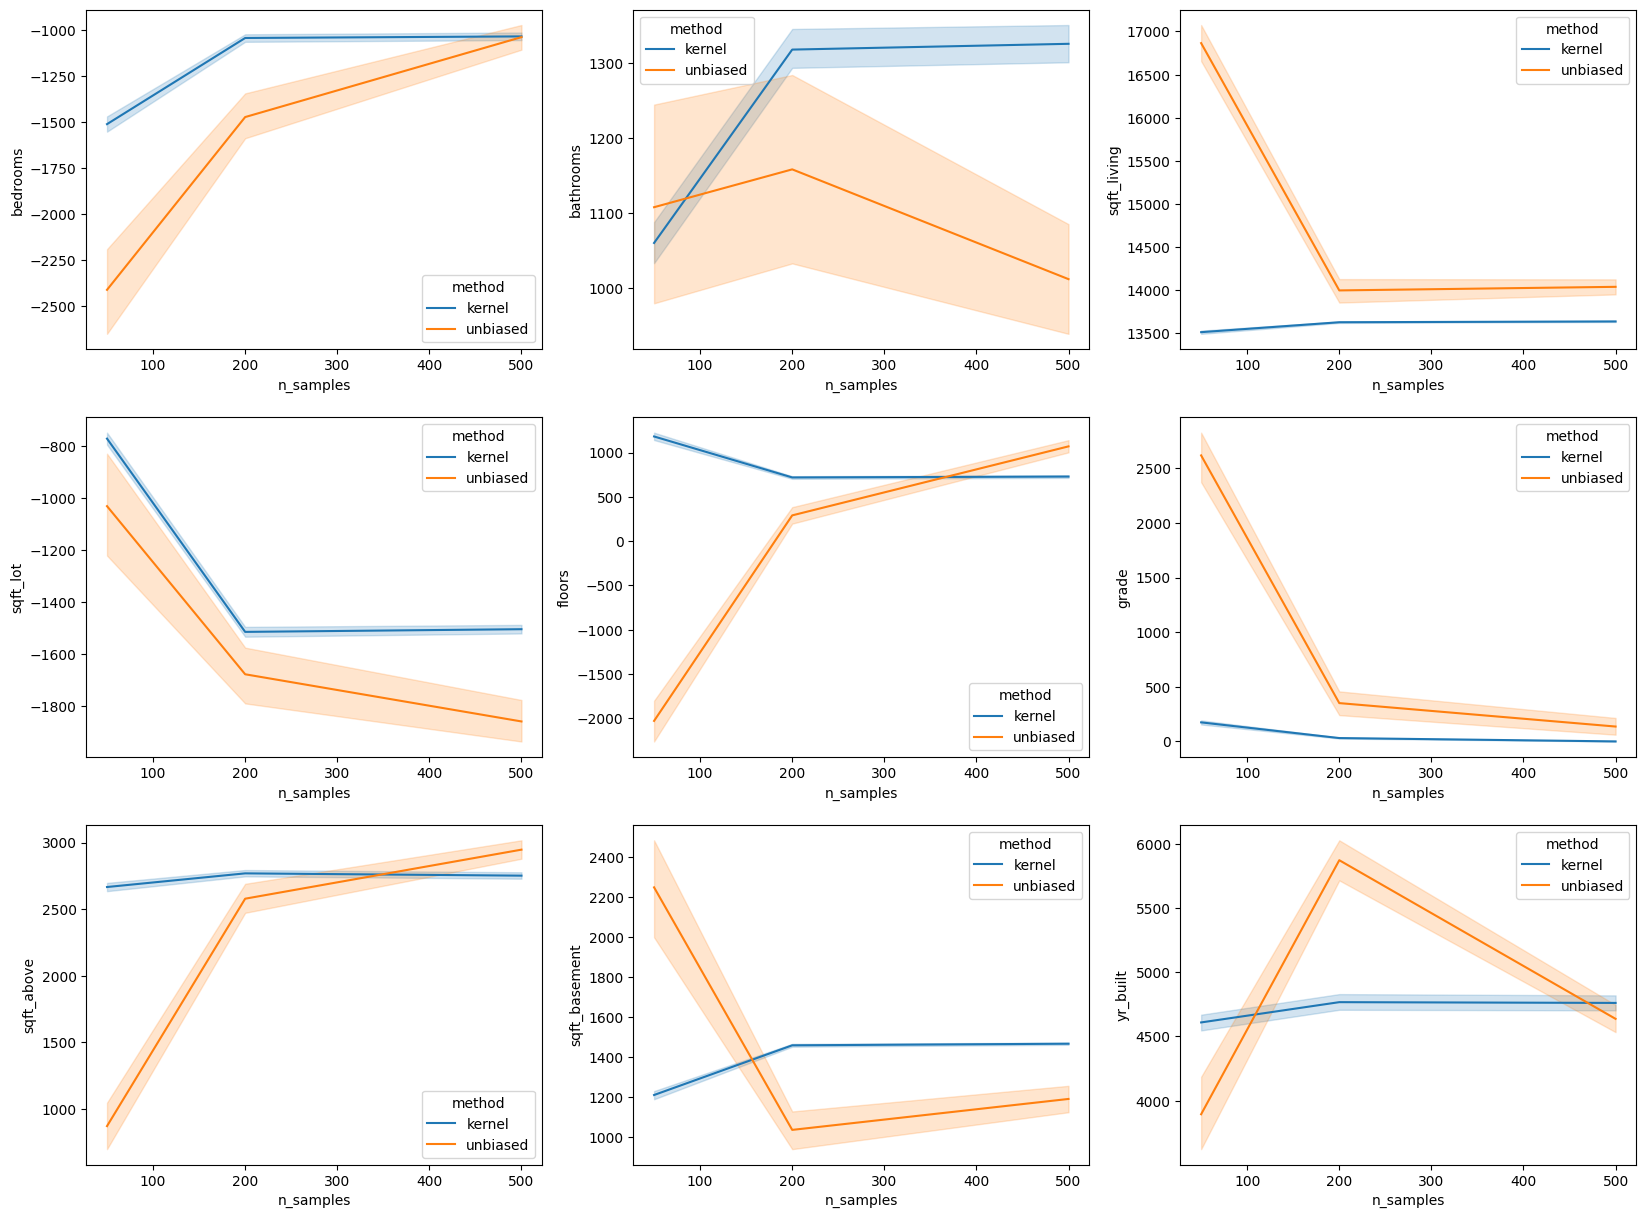

In [60]:
plot_features(housing_error_df.reset_index(), model='svm', observation_id=1, features=HOUSING_FEATURES)

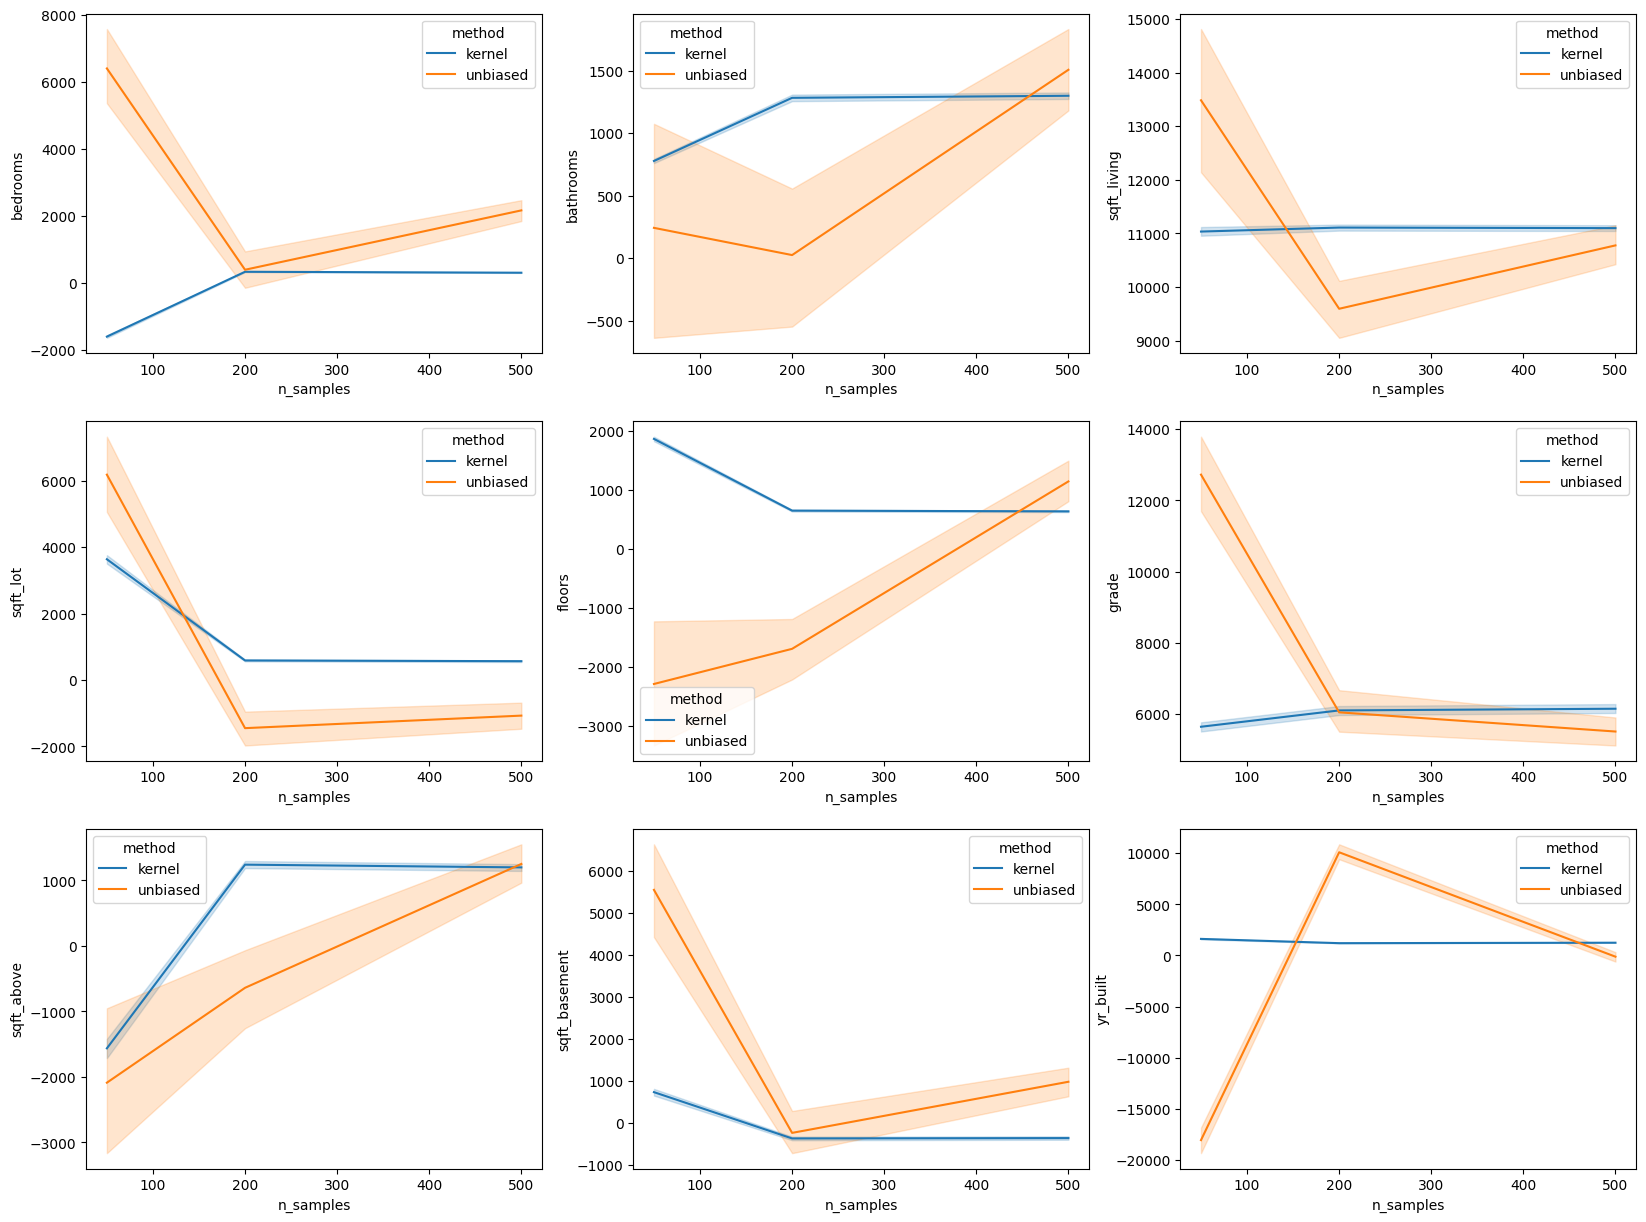

In [61]:
plot_features(housing_error_df.reset_index(), model='xgboost', observation_id=7, features=HOUSING_FEATURES)


## relative error

In [9]:
housing_rel_error_df = housing_error_df.copy().set_index('method', append=True)
sum_absolutes = housing_df[housing_df.method=='exact'].drop(columns='method').abs().sum(axis=1)
housing_rel_error_df = housing_rel_error_df.div(sum_absolutes, axis='index')
housing_rel_error_df

bedrooms  bathrooms  \
run_idx model   observation_id n_samples method                          
0       svm     0              50        kernel   -0.000005   0.000002   
                                         unbiased  0.048769  -0.142567   
                               200       kernel   -0.000005   0.000002   
                                         unbiased  0.113481   0.021403   
                               500       kernel   -0.000005   0.000002   
...                                                     ...        ...   
4999    xgboost 9              50        unbiased -0.009366  -0.029921   
                               200       kernel    0.002053   0.001437   
                                         unbiased  0.048375  -0.073022   
                               500       kernel    0.001363   0.002405   
                                         unbiased -0.004381  -0.023744   

                                                   sqft_living  sqft_lot  \
run_idx model   observation_id n_samples method                            
0       svm     0              50        kernel       0.112618 -0.005082   
                                         unbiased     0.209422 -0.188607   
                               200       kernel       0.112618 -0.005082   
                                         unbiased     0.080796  0.003683   
                               500       kernel       0.112618 -0.005082   
...                                                        ...       ...   
4999    xgboost 9              50        unbiased     0.065840  0.008071   
                               200       kernel       0.027148 -0.000348   
                                         unbiased     0.044706  0.012472   
                               500       kernel       0.025415  0.000418   
                                         unbiased     0.034075 -0.011124   

                                                     floors     grade  \
run_idx model   observation_id n_samples method                         
0       svm     0              50        kernel    0.000003  0.000044   
                                         unbiased  0.034555 -0.373885   
                               200       kernel    0.000003  0.000044   
                                         unbiased  0.116410  0.003931   
                               500       kernel    0.000003  0.000044   
...                                                     ...       ...   
4999    xgboost 9              50        unbiased -0.023067  0.053914   
                               200       kernel    0.000646 -0.004809   
                                         unbiased  0.014821 -0.035986   
                               500       kernel    0.001739 -0.003014   
                                         unbiased -0.011472  0.008485   

                                                   sqft_above  sqft_basement  \
run_idx model   observation_id n_samples method                                
0       svm     0              50        kernel      0.031890       0.014058   
                                         unbiased    0.290520       0.090753   
                               200       kernel      0.031890       0.014058   
                                         unbiased    0.034050      -0.047827   
                               500       kernel      0.031890       0.014058   
...                                                       ...            ...   
4999    xgboost 9              50        unbiased   -0.028417      -0.012707   
                               200       kernel      0.005786      -0.001844   
                                         unbiased    0.008662      -0.000882   
                               500       kernel      0.005702      -0.002441   
                                         unbiased   -0.001554       0.037850   

                                                   yr_built  
run_idx model   observation_id n_samples metho

In [10]:
def plot_models_methods(df: pd.DataFrame, feature: str) -> None:
    nrows = 2
    fig, axs = plt.subplots(nrows, 2, figsize=(20, nrows * 5))
    for i, model in enumerate(["svm", "xgboost"]):
        for j, method in enumerate(["kernel", "unbiased"]):
            idx = df.model == model
            idx &= df.method == method
            sns.lineplot(
                data=df[idx], x="n_samples", y=feature, hue="observation_id", ax=axs[i, j]
            ).set(title=f"{model}, {method}")



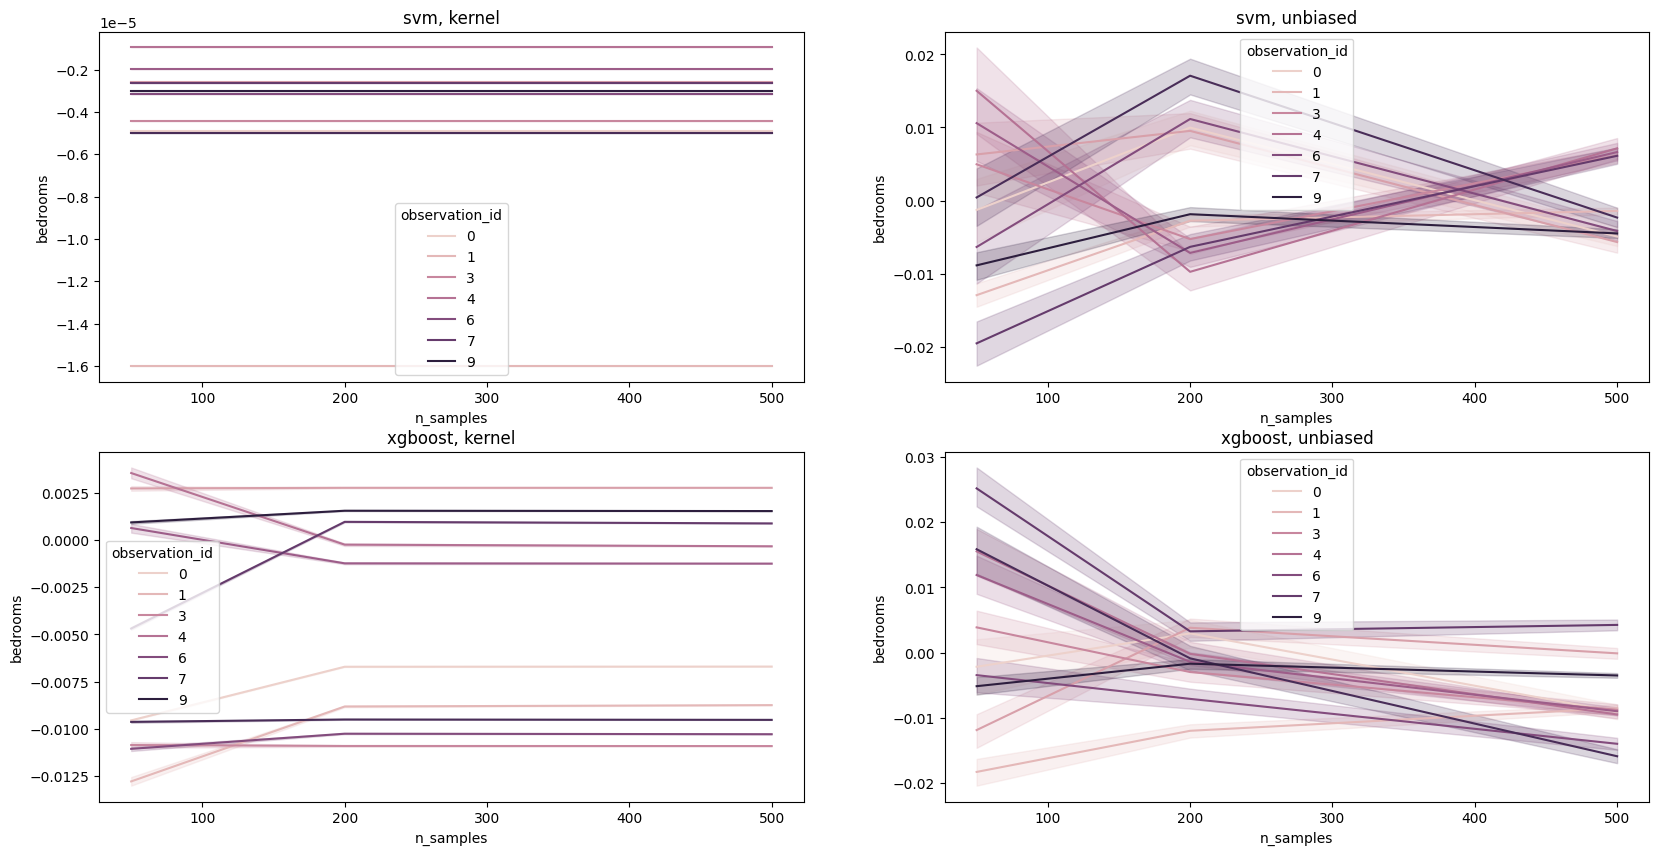

In [11]:
plot_models_methods(housing_rel_error_df.reset_index(), feature="bedrooms")


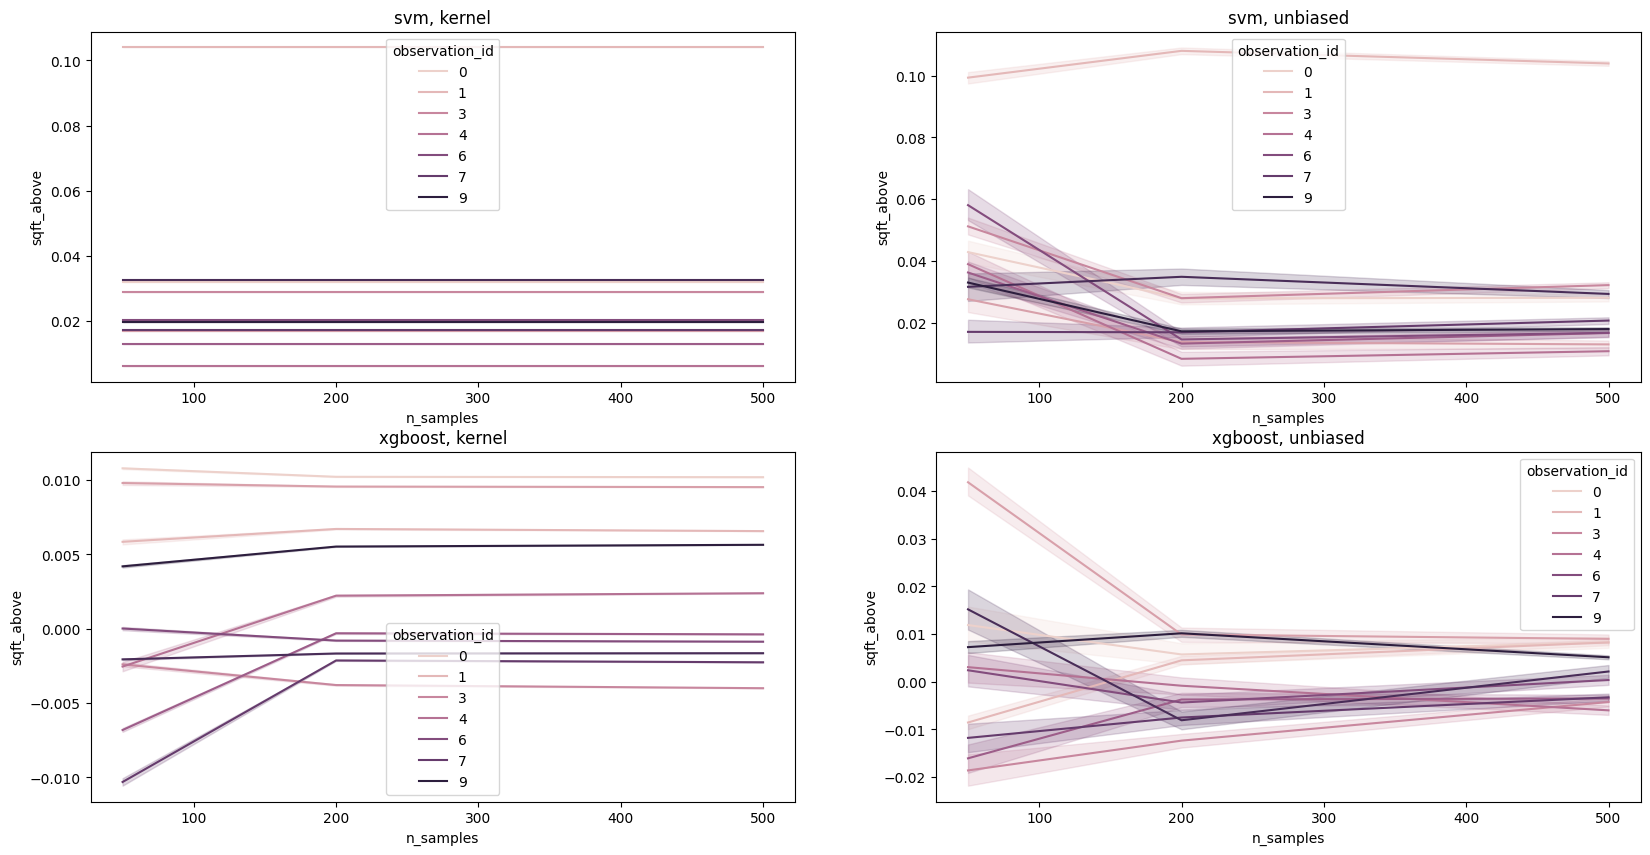

In [12]:
plot_models_methods(housing_rel_error_df.reset_index(), feature="sqft_above")


## summary

In [13]:
housing_error_summary_df = (
    housing_rel_error_df.stack().reset_index()
    .rename(columns={0: "error", "level_5": "feature"})
    .groupby(["model", "n_samples", "method"])['error']
    .std()
    .reset_index()
)
housing_error_summary_df['type'] =  housing_error_summary_df.method + "_n=" + housing_error_summary_df.n_samples.astype(str)
housing_error_summary_df


,model,n_samples,method,error,type
0,svm,50,kernel,0.045516,kernel_n=50
1,svm,50,unbiased,0.145561,unbiased_n=50
2,svm,200,kernel,0.045516,kernel_n=200
3,svm,200,unbiased,0.084387,unbiased_n=200
4,svm,500,kernel,0.045516,kernel_n=500
5,svm,500,unbiased,0.062571,unbiased_n=500
6,xgboost,50,kernel,0.015706,kernel_n=50
7,xgboost,50,unbiased,0.112126,unbiased_n=50
8,xgboost,200,kernel,0.014635,kernel_n=200
9,xgboost,200,unbiased,0.057439,unbiased_n=200


In [14]:
def plot_error_summary(df: pd.DataFrame) -> None:
    nrows = 1
    fig, axs = plt.subplots(nrows, 2, figsize=(20, nrows * 5))
    for i, model in enumerate(["svm", "xgboost"]):
        idx = df.model == model
        sns.barplot(
            data=df[idx].sort_values('error'), y="error", x="type", ax=axs[i]
        ).set(title=f"{model}")



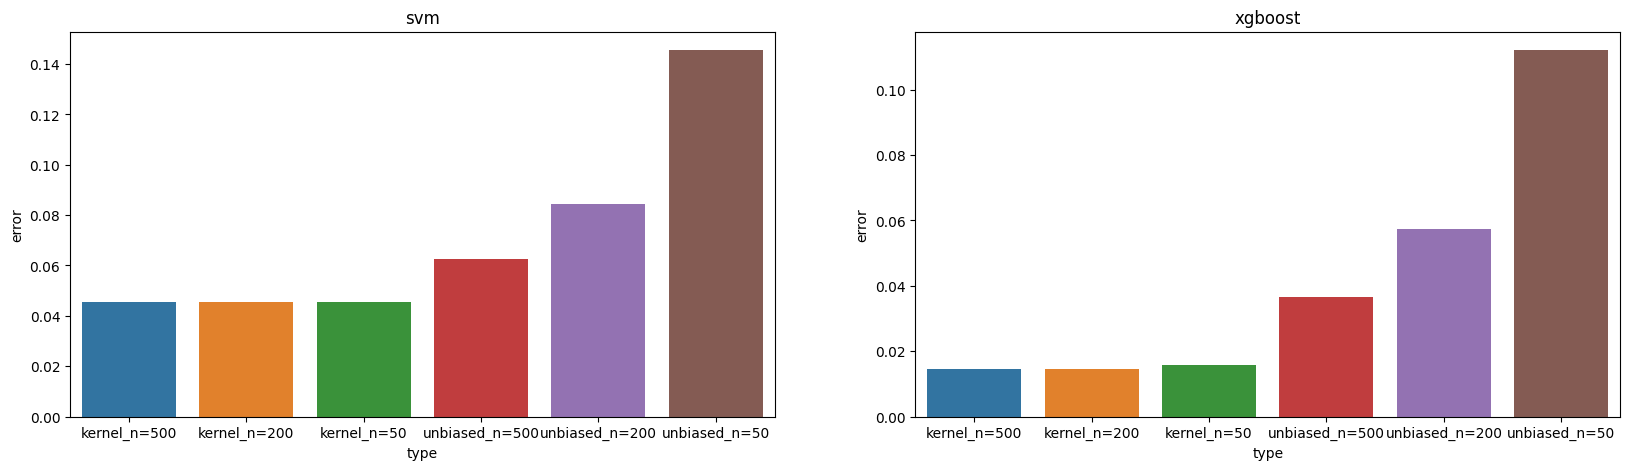

In [15]:
plot_error_summary(housing_error_summary_df)

# cancer

## relative (but not error)

In [16]:
cancer_in_df = pd.read_parquet(DATA_DIR / "estimates" / "combined" / "cancer.parquet")
cancer_in_df

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,run_idx,model,method,dataset,observation_id,n_samples
0,0.000000,-1.564037e+01,-13.711729,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-5.764919,-2.773178,0.000000,0,xgboost,kernel,cancer,0,50
1,1.475813,-1.432532e+01,-14.064751,0.000000,0.000000e+00,0.000000,1.191826,1.108392,0.821304,-1.345082,...,-1.694848,-4.219400,-1.503561,-0.774445,1,xgboost,kernel,cancer,0,50
2,0.000000,-1.421555e+01,-12.714939,0.521389,0.000000e+00,0.697155,0.000000,0.000000,0.000000,0.000000,...,-2.262361,-8.008179,0.000000,0.413025,2,xgboost,kernel,cancer,0,50
3,0.000000,-1.655089e+01,-15.358949,0.000000,0.000000e+00,0.000000,0.006041,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3,xgboost,kernel,cancer,0,50
4,0.000000,-1.524407e+01,-13.981716,1.543495,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.137930,-5.451713,-2.281954,0.000000,4,xgboost,kernel,cancer,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,-65711.266880,-1.830150e+06,32131.032231,-141885.605723,4.933173e+06,-174363.804340,-97511.486840,-363251.161795,-334065.260584,-542108.567889,...,-301404.880894,928394.143855,-486853.532064,17449.556649,4995,svm,unbiased,cancer,9,500
599996,-779007.254096,-2.462435e+06,415612.030206,21448.537234,4.926388e+06,244834.048223,-385157.449096,83503.854687,124218.595401,-467848.262247,...,-135164.105166,-130088.135028,-259946.918645,128655.700322,4996,svm,unbiased,cancer,9,500
599997,373945.896986,-3.169741e+06,-282015.403721,-80457.801697,4.762646e+06,594822.137114,313779.994168,-130280.846234,451700.830246,312610.202743,...,-135141.878020,17435.437779,784007.305300,430410.722512,4997,svm,unbiased,cancer,9,500
599998,-112188.801929,-2.468621e+06,105783.703949,-244547.895229,4.405407e+06,-123263.001219,157684.309728,558425.521358,37681.635649,83887.587030,...,-134475.227838,518176.115656,344080.223281,-2259.406462,4998,svm,unbiased,cancer,9,500


In [17]:
CANCER_FEATURES = [
    "avgAnnCount",
    "avgDeathsPerYear",
    "incidenceRate",
    "medIncome",
    "popEst2015",
    "povertyPercent",
    "studyPerCap",
    "MedianAge",
    "MedianAgeMale",
    "MedianAgeFemale",
    "AvgHouseholdSize",
    "PercentMarried",
    "PctNoHS18_24",
    "PctHS18_24",
    "PctSomeCol18_24",
    "PctBachDeg18_24",
    "PctHS25_Over",
    "PctBachDeg25_Over",
    "PctEmployed16_Over",
    "PctUnemployed16_Over",
    "PctPrivateCoverage",
    "PctPrivateCoverageAlone",
    "PctEmpPrivCoverage",
    "PctPublicCoverage",
    "PctPublicCoverageAlone",
    "PctWhite",
    "PctBlack",
    "PctAsian",
    "PctOtherRace",
    "PctMarriedHouseholds",
    "BirthRate",
]


In [18]:
cancer_df = cancer_in_df.set_index(["model", "method", "observation_id", "run_idx", "n_samples"]).drop(columns='dataset')
cancer_df

avgAnnCount  \
model   method   observation_id run_idx n_samples                  
xgboost kernel   0              0       50              0.000000   
                                1       50              1.475813   
                                2       50              0.000000   
                                3       50              0.000000   
                                4       50              0.000000   
...                                                          ...   
svm     unbiased 9              4995    500        -65711.266880   
                                4996    500       -779007.254096   
                                4997    500        373945.896986   
                                4998    500       -112188.801929   
                                4999    500        205583.130774   

                                                   avgDeathsPerYear  \
model   method   observation_id run_idx n_samples                     
xgboost kernel   0              0       50            -1.564037e+01   
                                1       50            -1.432532e+01   
                                2       50            -1.421555e+01   
                                3       50            -1.655089e+01   
                                4       50            -1.524407e+01   
...                                                             ...   
svm     unbiased 9              4995    500           -1.830150e+06   
                                4996    500           -2.462435e+06   
                                4997    500           -3.169741e+06   
                                4998    500           -2.468621e+06   
                                4999    500           -3.153335e+06   

                                                   incidenceRate  \
model   method   observation_id run_idx n_samples                  
xgboost kernel   0              0       50            -13.711729   
                                1       50            -14.064751   
                                2       50            -12.714939   
                                3       50            -15.358949   
                                4       50            -13.981716   
...                                                          ...   
svm     unbiased 9              4995    500         32131.032231   
                                4996    500        415612.030206   
                                4997    500       -282015.403721   
                                4998    500        105783.703949   
                                4999    500        192667.003044   

                                                       medIncome  \
model   method   observation_id run_idx n_samples                  
xgboost kernel   0              0       50              0.000000   
                                1       50              0.000000   
                                2       50              0.521389   
                                3       50              0.000000   
                                4       50              1.543495   
...                                                          ...   
svm     unbiased 9              4995    500       -141885.605723   
                                4996    500         21448.537234   
                                4997    500        -80457.801697   
                                4998    500       -244547.895229   
                                4999    500        403093.133604   

                                                     popEst2015  \
model   method   observation_id run_idx n_samples                 
xgboost kernel   0              0       50         0.000000e+00   
                                1       50         0.000000e+00   
                                2       50         0.000000e+00   
                                3       50         0.000000e+00   
                                4       50         0.000000e+00   
...  

In [19]:
cancer_rel_df = cancer_df.div(cancer_df.abs().sum(axis=1), axis='index')
cancer_rel_df

avgAnnCount  \
model   method   observation_id run_idx n_samples                
xgboost kernel   0              0       50            0.000000   
                                1       50            0.019900   
                                2       50            0.000000   
                                3       50            0.000000   
                                4       50            0.000000   
...                                                        ...   
svm     unbiased 9              4995    500          -0.004435   
                                4996    500          -0.049006   
                                4997    500           0.022764   
                                4998    500          -0.007970   
                                4999    500           0.013189   

                                                   avgDeathsPerYear  \
model   method   observation_id run_idx n_samples                     
xgboost kernel   0              0       50                -0.239317   
                                1       50                -0.193163   
                                2       50                -0.213069   
                                3       50                -0.280935   
                                4       50                -0.221146   
...                                                             ...   
svm     unbiased 9              4995    500               -0.123509   
                                4996    500               -0.154909   
                                4997    500               -0.192955   
                                4998    500               -0.175363   
                                4999    500               -0.202299   

                                                   incidenceRate  medIncome  \
model   method   observation_id run_idx n_samples                             
xgboost kernel   0              0       50             -0.209807   0.000000   
                                1       50             -0.189649   0.000000   
                                2       50             -0.190577   0.007815   
                                3       50             -0.260703   0.000000   
                                4       50             -0.202833   0.022391   
...                                                          ...        ...   
svm     unbiased 9              4995    500             0.002168  -0.009575   
                                4996    500             0.026146   0.001349   
                                4997    500            -0.017167  -0.004898   
                                4998    500             0.007515  -0.017372   
                                4999    500             0.012360   0.025860   

                                                   popEst2015  povertyPercent  \
model   method   observation_id run_idx n_samples                               
xgboost kernel   0              0       50           0.000000        0.000000   
                                1       50           0.000000        0.000000   
                                2       50           0.000000        0.010449   
                                3       50           0.000000        0.000000   
                                4       50           0.000000        0.000000   
...                                                       ...             ...   
svm     unbiased 9              4995    500          0.332918       -0.011767   
                                4996    500          0.309913        0.015402   
                                4997    500          0.289922        0.036209   
                                4998    500          0.312945       -0.008756   
                                4999    500          0.330112        0.032894   

                                                   studyPerCap  MedianAge  \
model   method   observation_id run_idx n_samples                           
xgboost kernel   0              

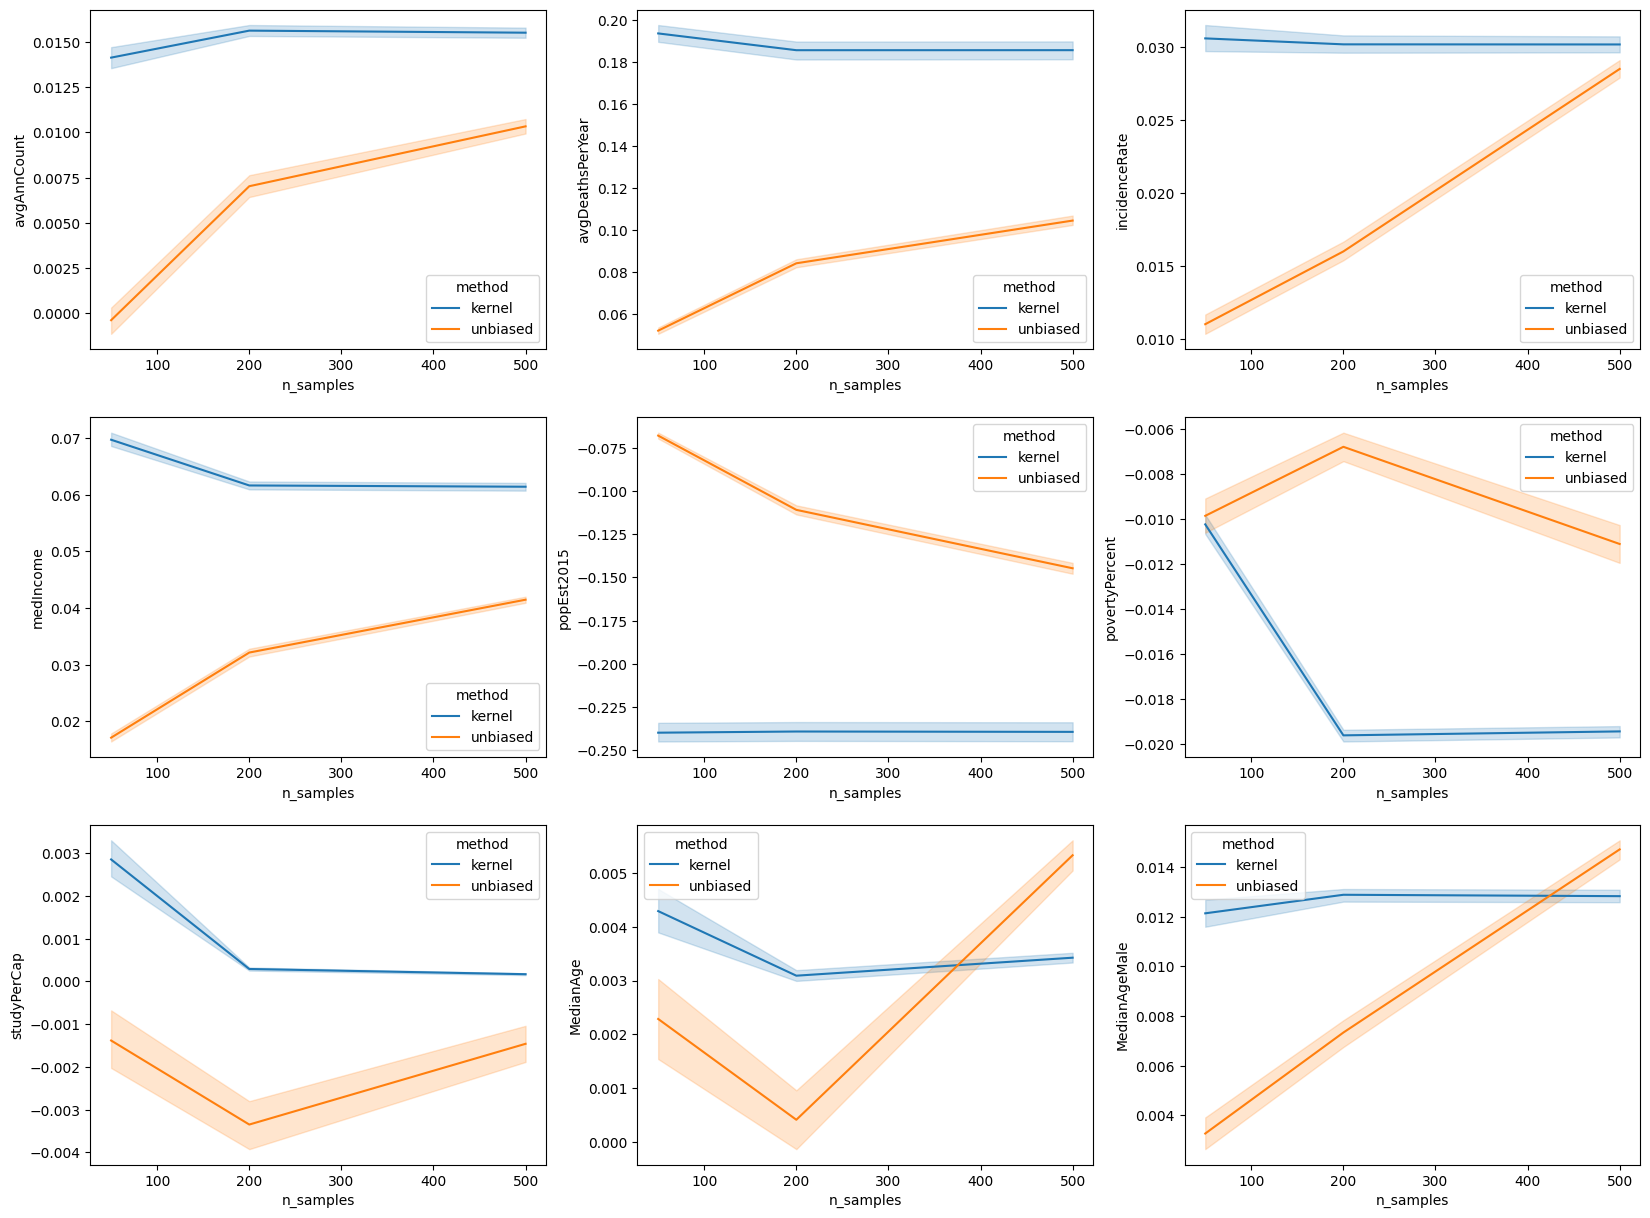

In [20]:
plot_features(cancer_rel_df.reset_index(), model='svm', observation_id=2, features=CANCER_FEATURES[:9])

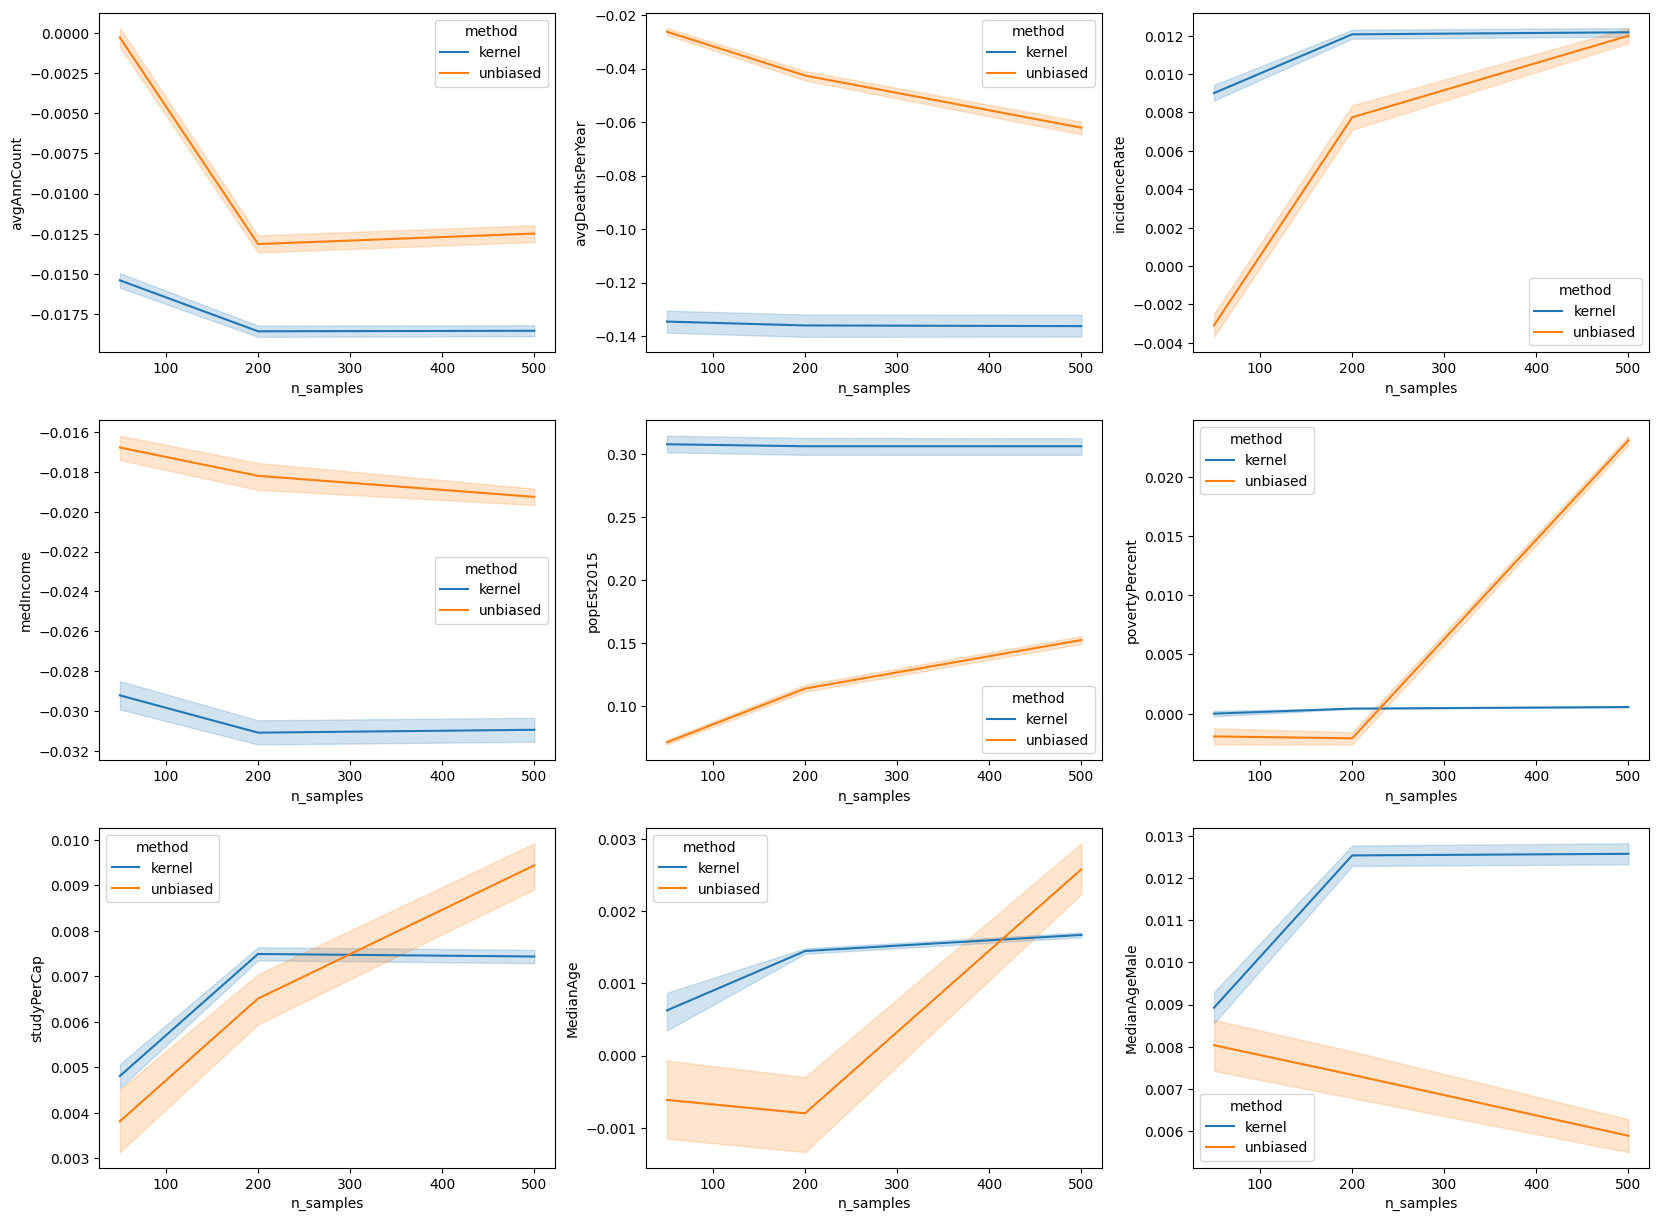

In [62]:
plot_features(cancer_rel_df.reset_index(), model='xgboost', observation_id=9, features=CANCER_FEATURES[:9])


## summary

In [54]:
cancer_std_summary_df = (
    cancer_rel_df.groupby(["model", "n_samples", "method"])
    .std()
    .stack()
    .reset_index()
    .rename(columns={0: "value", "level_3": "feature"})
)
cancer_std_summary_df["type"] = (
    cancer_std_summary_df.method + "_n=" + cancer_std_summary_df.n_samples.astype(str)
)
cancer_std_summary_df = cancer_std_summary_df.groupby(["model", "type"]).mean().reset_index()
cancer_std_summary_df


,model,type,n_samples,value
0,svm,kernel_n=200,200.0,0.020410
1,svm,kernel_n=50,50.0,0.024862
2,svm,kernel_n=500,500.0,0.020410
3,svm,unbiased_n=200,200.0,0.031335
4,svm,unbiased_n=50,50.0,0.034513
5,svm,unbiased_n=500,500.0,0.028320
6,xgboost,kernel_n=200,200.0,0.039898
7,xgboost,kernel_n=50,50.0,0.048577
8,xgboost,kernel_n=500,500.0,0.039535
9,xgboost,unbiased_n=200,200.0,0.040297


In [55]:
def plot_std_summary(df: pd.DataFrame) -> None:
    nrows = 1
    fig, axs = plt.subplots(nrows, 2, figsize=(20, nrows * 5))
    for i, model in enumerate(["svm", "xgboost"]):
        idx = df.model == model
        sns.barplot(
            data=df[idx].sort_values('value'), y="value", x="type", ax=axs[i]
        ).set(title=f"{model}")



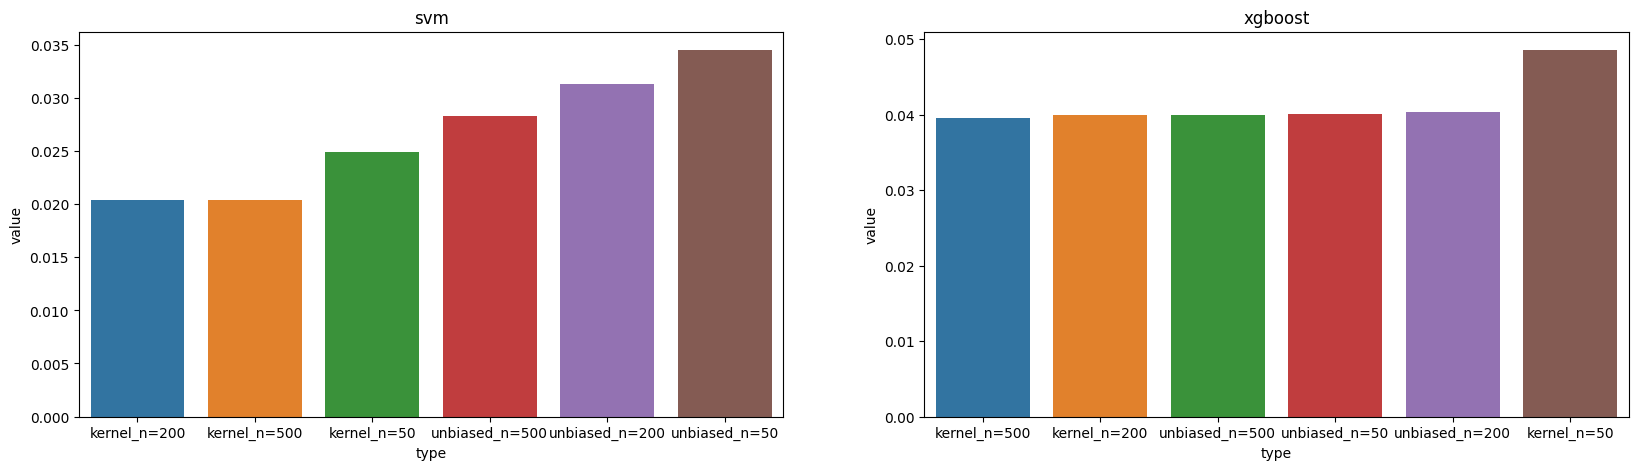

In [56]:
plot_std_summary(cancer_std_summary_df)